<h1> draft for intial data Analysis </h1>

This notebook contain drafts for analysis functions, plotting functions, and scripts for the 6OHDA project

import modules and files:

In [34]:
%matplotlib notebook 
%load_ext autoreload
%autoreload 2


#inline
import os
os.chdir('/home/dana_z/ssd_2TB/6OHDA')
#import mpld3
#mpld3.enable_notebook()
import numpy as np
import scipy as sci
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import gridspec
import sys
import h5py
from IO import *
from utils import *
from plotUtils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


collect data from all mice, and plot beta power over group by day:

In [29]:
baselines = getData('Data_6OHDA.h5',['lfp'],period ='Pre',day = lambda x: int(x)==0)
early = getData('Data_6OHDA.h5',['lfp'],period ='Pre',day = lambda x: (int(x)<= 3) & (x>0))
mid = getData('Data_6OHDA.h5',['lfp'],period ='Pre',day = lambda x: (int(x)> 6) & (x<=8))
late = getData('Data_6OHDA.h5',['lfp'],period ='Pre',day = lambda x: (int(x)>= 15 ))

cleaning up lfp data
I deleted session: 4539_BaselineA
cleaning up lfp data
cleaning up lfp data
cleaning up lfp data
I deleted session: 4539_day15A
I deleted session: 4539_day30A
I deleted session: 7584_day30A
I deleted session: 7909_day15A
I deleted session: 7909_day30A


In [24]:
def getPowerSpec(lfpDict):
    # This function takes in a dict with lfp data (that was returned from getData())
    # and returns the average power spectra
    # Inputs: 
    #   lfpDict - a dictionary with lfp data as returned from getData()
    # Outputs:
    #   M - mean power spectra
    #   Std - standard diviation of power spectra
    #   f - frequency list

    data = []
    for j in lfpDict:
        lfp = lfpDict[j]['lfp']['lfp']
        f, t, Sxx = signal.spectrogram(lfp[:,0],lfpDict[j]['lfp']['FS'],window=('hamming'),nperseg=140,noverlap =120,nfft=1200)
       
        
        Power = np.sum(Sxx,1)
        totPower = np.sum(Power)
        if totPower == 0:
            continue
            
        #beta = np.mean(getPowerInBand(f,Sxx,13,20)/np.sum(Sxx,axis = 0)
        data.append(Power/totPower)    



    data = np.array(data)
    M = np.mean(data,axis=0)
    Std = np.std(data, axis = 0)
    return M, Std, f

/home/dana_z/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


<IPython.core.display.Javascript object>


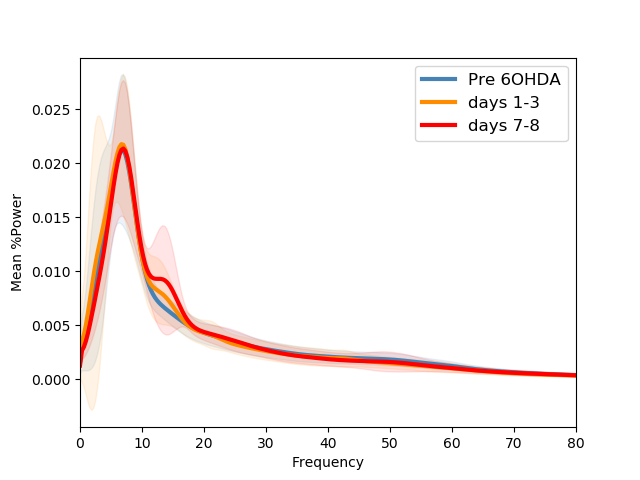

(0, 80)

In [31]:
cond = ['baselines','early','mid']#,'late']
Names = {'baselines':'Pre 6OHDA','early':'days 1-3','mid':'days 7-8' ,'late':'days 15-35'}
Colors = {'baselines':'steelblue','early':'darkorange','mid':'red' ,'late':'black'}

for c in cond:
    M,Std, f = getPowerSpec(eval(c))
    plt.plot(f, M, linewidth=3,color=Colors[c],label=Names[c])
    plt.fill_between(f, M-Std, M+Std,color=Colors[c],alpha=0.1)
plt.ylabel('Mean %Power')
plt.xlabel('Frequency')
plt.legend(fontsize=12)
plt.xlim((0,80))

<h2> Aligning Ca activity to movement: </h2>

In [12]:
PVdataH = getData('Data_6OHDA.h5',['trace','mvmt'],period ='Pre',cre='PV',red=True, day=(lambda x: int(x)==0))
PVdataP = getData('Data_6OHDA.h5',['trace','mvmt'],period ='Pre',cre='PV',red=True, day=(lambda x: int(x)>0))
CHIdataH = getData('Data_6OHDA.h5',['trace','mvmt'],period ='Pre',cre='CHI',red=True, day=(lambda x: int(x)==0))
CHIdataP = getData('Data_6OHDA.h5',['trace','mvmt'],period ='Pre',cre='CHI',red=True, day=(lambda x: int(x)>0))
MSNdataH = getData('Data_6OHDA.h5',['trace','mvmt'],period ='Pre',red=False, day=(lambda x: int(x)==0))
MSNdataP = getData('Data_6OHDA.h5',['trace','mvmt'],period ='Pre',red=False, day=(lambda x: int(x)>0))

cleaning up trace data
cleaning up mvmt data
cleaning up trace data
I deleted session: 4539_day13
I deleted session: 4539_day4
I deleted session: 4539_day5
I deleted session: 7584_day1
I deleted session: 7584_day10
I deleted session: 7584_day30A
I deleted session: 7909_day13
I deleted session: 7909_day30A
I deleted session: 7909_day6
I deleted session: 8430_day1
I deleted session: 8430_day13
I deleted session: 8430_day15A
I deleted session: 8430_day9
I deleted session: 8803_day12
I deleted session: 8803_day19L
I deleted session: 8803_day5
I deleted session: 8803_day6
cleaning up mvmt data
cleaning up trace data
I deleted session: 0761_BaselineL
I deleted session: 0761_BaselineS
I deleted session: 1253_BaselineS
I deleted session: 1793_BaselineA
cleaning up mvmt data
cleaning up trace data
I deleted session: 0761_day1
I deleted session: 0761_day10
I deleted session: 0761_day14A
I deleted session: 1208_day19L
I deleted session: 1222_day11
I deleted session: 1222_day13
I deleted session: 

Check how many sessions left in each condition:

In [13]:
cond = ['PVdataH','PVdataP','CHIdataH','CHIdataP','MSNdataH','MSNdataP']
for c in cond:
    print(c + ':' + str(len(eval(c + '.keys()'))) + ' sessions')

PVdataH:10 sessions
PVdataP:62 sessions
CHIdataH:17 sessions
CHIdataP:31 sessions
MSNdataH:40 sessions
MSNdataP:167 sessions


because there aren't any current CHI session, remove from cond list: 

In [14]:
cond = ['PVdataH','PVdataP','MSNdataH','MSNdataP']
Names = {'PVdataH':'PV - healthy','PVdataP':'PV - post 6OHDA','MSNdataH':'MSN - healthy','MSNdataP':'MSN - post 6OHDA'}
Colors = {'PVdataH':'mediumseagreen','PVdataP':'darkgreen','MSNdataH':'cornflowerblue','MSNdataP':'navy'}

Visially inspect how traces looks:

In [ ]:
rosterPlot(PVdataH['1236_BaselineS']['trace']['dff'],1/PVdataH['1236_BaselineA']['trace']['Fs'],5)

<b>** make a note to double check all traces and remove the bad ones prior to making final struct file</b>

for now: continue with the analysis.
find onset of Ca events - align to movement onset and plot


In [15]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))

de = {}

dt = 1/PVdataH['1236_BaselineA']['trace']['Fs'][0]   # random session, assuming all session have the same dt...
tPlot = np.linspace(-40*dt,40*dt,80)


for c in cond:
    data = eval(c)
    for s in data.keys():
        
        # Vectors are saved as column vectors so.. transposed to raw vector
        if data[s]['trace']['dff'].shape[1] == 1:
            data[s]['trace']['dff'] = data[s]['trace']['dff'].T
                
        sOnset = FindMvmtOnset(data[s]['mvmt']['speed'],hi = 25)    
        print(data[s]['trace']['dff'].T.shape)
        caOnset = formatCaOnset(data[s]['trace']['dff'].T,th = 2, th2 = 3)
        
        sA = alignToOnset(data[s]['trace']['dff'].T, sOnset, winPost=40,winPre=40)
        
        cAs = np.empty((tPlot.size,0))
        #n = 0
        for p in range(0,caOnset.shape[1]):
            al = alignToOnset(data[s]['mvmt']['speed'], caOnset[:,p], winPost=40,winPre=40)
            if al.ndim ==1:
                al.shape = (tPlot.size,1)
        #    n = n +al.shape[1]
            cAs = np.concatenate((cAs,np.mean(al,1,keepdims=True)),axis=1)
        
        cAr = np.empty((tPlot.size,0))
        for p in range(0,caOnset.shape[1]):
            al = alignToOnset(data[s]['mvmt']['rot'], caOnset[:,p], winPost=40,winPre=40)
            if al.ndim ==1:
                al.shape = (tPlot.size,1)
            cAr = np.concatenate((cAs,np.mean(al,1,keepdims=True)),axis=1)

        if len(sA.shape) > 2:
            sA = np.mean(sA,2)
            if 'sAligned' not in locals():
#                print(s+' :',sA.shape)
                sAligned = sA
            else:
#                print(s+' :',sA.shape,sAligned.shape)
                sAligned = np.concatenate((sAligned,sA),axis=1)
        
        print(cAs.shape)
        
        if cAs.ndim > 1:
#            cAs = np.mean(cAs,1)
            if 'caAlignedS' not in locals():
    #           print(s+' :',sA.shape)
                caAlignedS = cAs
            else:
#                print(s+' :',cAs.shape,caAlignedS.shape)
                caAlignedS = np.concatenate((caAlignedS,cAs),axis=1)

        if cAr.ndim > 1:
#            cAr = np.mean(cAr,1)
            if 'caAlignedR' not in locals():
    #            print(s+' :',sA.shape)
                caAlignedR = cAr
            else:
                print(s+' :',cAr.shape,caAlignedR.shape)
                caAlignedR = np.concatenate((caAlignedR,cAr),axis=1)

    
    PlotRelativeToOnset(ax[0],sAligned,tPlot,Color=Colors[c],Label=Names[c],mesErr=True)
    PlotRelativeToOnset(ax[1],caAlignedS,tPlot,Color=Colors[c],Label=Names[c],mesErr=True)
    PlotRelativeToOnset(ax[2],caAlignedR,tPlot,Color=Colors[c],Label=Names[c],mesErr=True)
    del sAligned
    del caAlignedS
    del caAlignedR
ax[0].legend(fontsize=12)

<IPython.core.display.Javascript object>

ValueError: Speed must be vector

<IPython.core.display.Javascript object>


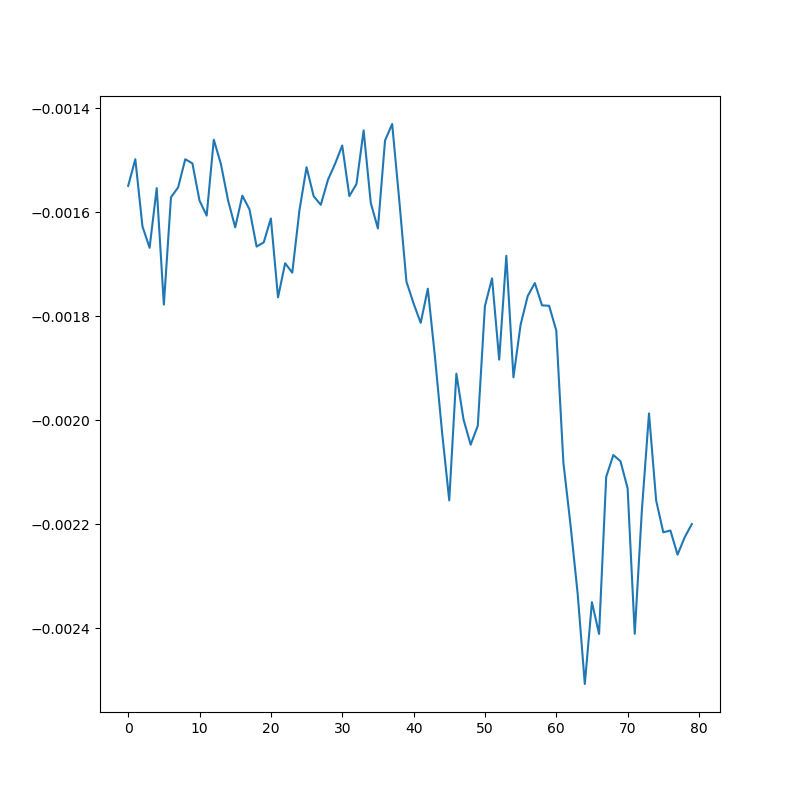

In [14]:
c  = cond[2]
fig, ax = plt.subplots(1,1,figsize=(8, 8))
#PlotRelativeToOnset(ax,de[c],tPlot,Color=Colors[c],Label=Names[c],mesErr=True)
plt.plot(np.nanmean(de[c],axis=1))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5, 5.0))
plt.plot(PVdataH['8803_BaselineA']['mvmt']['speed'])

In [36]:
#del sAligned
#del caAlignedS
#del caAlignedR
del data


In [43]:
%%timeit 
cAs = np.empty((tPlot.size,0))
for p in range(0,caOnset.shape[1]):
    al = alignToOnset(data[s]['mvmt']['speed'], caOnset[:,p], winPost=40,winPre=40)
    if al.ndim ==1:
        al.shape = (tPlot.size,1)
    cAs = np.concatenate((cAs,al),axis=1)

5.22 s ± 290 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%%timeit 
cAs = np.empty((tPlot.size,0))
n = 0
for p in range(0,caOnset.shape[1]):
    al = alignToOnset(data[s]['mvmt']['speed'], caOnset[:,p], winPost=40,winPre=40)
    if al.ndim ==1:
        al.shape = (tPlot.size,1)
    n = n +al.shape[1]
    cAs = np.concatenate((cAs,np.mean(al,1,keepdims=True)),axis=1)
print(cAs.shape)

(80, 509)
(80, 509)
(80, 509)
(80, 509)
(80, 509)
(80, 509)
(80, 509)
(80, 509)
823 ms ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
cAs.shape

(80, 44259)

In [46]:
caOnset.shape

(11901, 509)

In [66]:
from utils import alignToOnset

In [20]:
#caOnset = formatCaOnset(data[s]['trace']['dff'].T,th = 2, th2 = 3)
data[s]['trace']['dff'].T[:,0].shape
#y,x = getCaOnset(data[s]['trace']['dff'].T[:,0],2,3,wlenMA=10,wlenDetrend=500,oldPeaks=None)

data[s]['trace']['dff'].shape

(11901, 1)

In [19]:
lfp = late['1208_day12']['lfp']
f, t, Sxx = signal.spectrogram(lfp['lfp'][:,0],lfp['FS'],window=('hamming'),nperseg=140,noverlap =120,nfft=1200)
Power = np.sum(Sxx,1)
totPower = np.sum(Power)

print(Power)
print(totPower)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/dana_z/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


In [22]:
np.unique(lfp['lfp'][:,0])

array([3.08751551e-05])